In [241]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
df = pd.read_csv("C://Users//matte//OneDrive//Desktop//data mining//datasetAutoScout//scrapingAutoScoutCompleteRelScore.csv", encoding='unicode_escape', delimiter =",")

339.619999999999


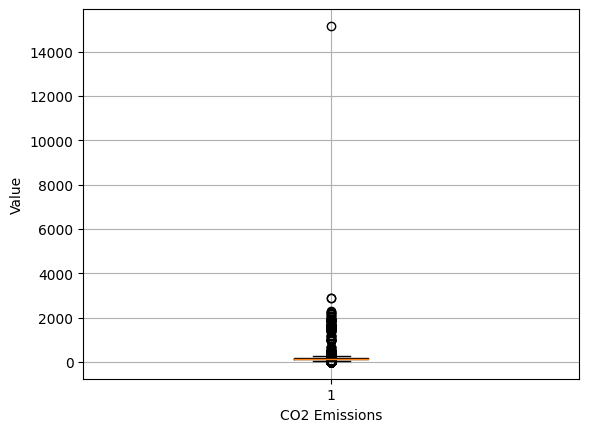

In [242]:
q = df["CO2 Emissions"].quantile(0.99)
plt.boxplot(df["CO2 Emissions"])
plt.xlabel("CO2 Emissions")
plt.ylabel("Value")
plt.grid(zorder=0)
plt.savefig("C://Users//matte//OneDrive//Desktop//data mining//datasetAutoScout//images//co2emissionsoutliers.png")
print(q)
df = df[df["CO2 Emissions"] < q]


514.0400000000081
60.0


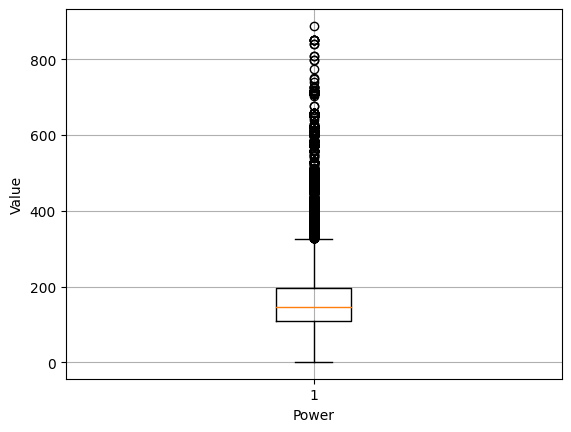

In [243]:
q_hi = df["Power"].quantile(0.99)
q_low = df["Power"].quantile(0.01)
plt.boxplot(df["Power"])
plt.xlabel("Power")
plt.ylabel("Value")
plt.grid(zorder=0)
plt.savefig("C://Users//matte//OneDrive//Desktop//data mining//datasetAutoScout//images//poweroutliers.png")
print(q_hi)
print(q_low)
df = df[(df["Power"] < q_hi) & (df["Power"] > q_low)]

6162.0
875.0


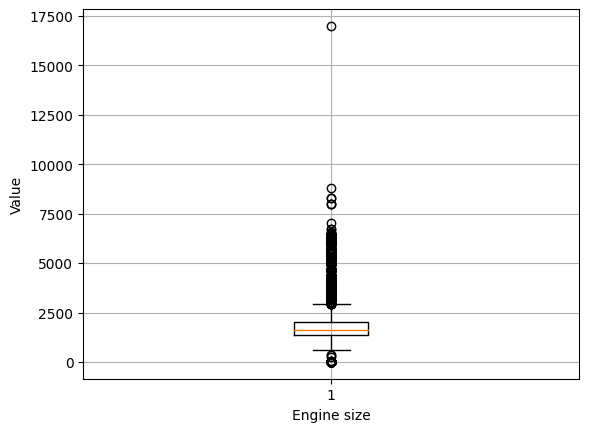

In [244]:
q_hi = df["Engine size"].quantile(0.99)
q_low = df["Engine size"].quantile(0.01)
plt.boxplot(df["Engine size"])
plt.xlabel("Engine size")
plt.ylabel("Value")
plt.grid(zorder=0)
plt.savefig("C://Users//matte//OneDrive//Desktop//data mining//datasetAutoScout//images//engsizeoutliers.png")

print(q_hi)
print(q_low)
df = df[(df["Engine size"] < q_hi) & (df["Engine size"] > q_low)]

2696.0
845.0


Body type                                23088
CO2 Emissions                            23088
Colour                                   23088
Comfort & Convenience                    23088
Country                                  23088
Cylinders                                23088
Doors                                    23088
4WD                                      23088
Emission class                           23088
Empty weight                             23088
Engine size                              23088
Entertainment & Media                    23088
Extras                                   23088
First registration                       23088
Fuel consumption                         23088
Fuel type                                23088
Gearbox                                  23088
Gears                                    23088
Manufacturer                             23088
Mileage                                  23088
Model                                    23088
Power        

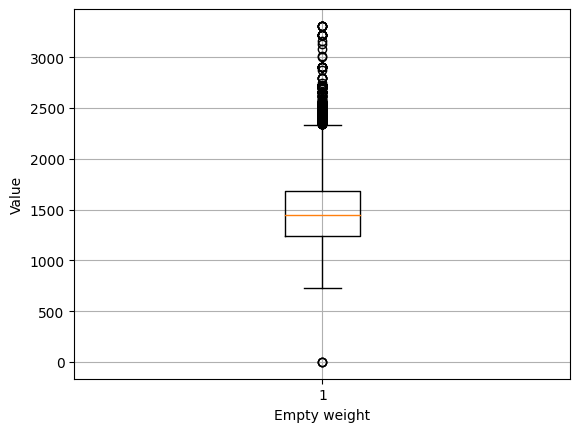

In [245]:
q_hi = df["Empty weight"].quantile(0.99)
q_low = df["Empty weight"].quantile(0.01)
plt.boxplot(df["Empty weight"])
plt.xlabel("Empty weight")
plt.ylabel("Value")
plt.grid(zorder=0)
plt.savefig("C://Users//matte//OneDrive//Desktop//data mining//datasetAutoScout//images//empweightoutliers.png")

print(q_hi)
print(q_low)
df = df[(df["Empty weight"] < q_hi) & (df["Empty weight"] > q_low)]
df.count()

In [246]:
for index,value in df['Seats'].items():
    if value > 9:
        df.drop([index], axis=0, inplace=True)
        
for index,value in df['Doors'].items():
    if value < 2:
        df.drop([index], axis=0, inplace=True)

for index,value in df['Fuel type'].items():
    if value == 6:
        df['Fuel consumption'].at[index] = 0
df.count()

Body type                                23085
CO2 Emissions                            23085
Colour                                   23085
Comfort & Convenience                    23085
Country                                  23085
Cylinders                                23085
Doors                                    23085
4WD                                      23085
Emission class                           23085
Empty weight                             23085
Engine size                              23085
Entertainment & Media                    23085
Extras                                   23085
First registration                       23085
Fuel consumption                         23085
Fuel type                                23085
Gearbox                                  23085
Gears                                    23085
Manufacturer                             23085
Mileage                                  23085
Model                                    23085
Power        

In [247]:
for index,value in df['Fuel consumption'].items():
    if value > 30:
        df.drop([index], axis=0, inplace=True)

for index,value in df['Country'].items():
    df['Country'].at[index] = value.strip()
    value = df['Country'].at[index]
    if value == "Ortsteil Lachen-Speyerdorf" or value == "Roma":
        df['Country'].at[index] = "DE"

for index,value in df['Gears'].items():
    if value == 0 or value == 1:
        df['Gears'].at[index] = 5

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23080 entries, 1 to 25038
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Body type                              23080 non-null  object 
 1   CO2 Emissions                          23080 non-null  float64
 2   Colour                                 23080 non-null  object 
 3   Comfort & Convenience                  23080 non-null  int64  
 4   Country                                23080 non-null  object 
 5   Cylinders                              23080 non-null  int64  
 6   Doors                                  23080 non-null  int64  
 7   4WD                                    23080 non-null  int64  
 8   Emission class                         23080 non-null  int64  
 9   Empty weight                           23080 non-null  int64  
 10  Engine size                            23080 non-null  int64  
 11  En

In [249]:
pd.DataFrame(df.corr()["Price"].sort_values(ascending=False).head(50))[1:]

,Price
Power,0.679775
Empty weight,0.524184
Gears,0.520177
Car reliability score,0.478688
Gearbox,0.455307
First registration,0.449459
Comfort & Convenience,0.423377
Engine size,0.402226
Safety & Security,0.351583
Emission class,0.346662


In [250]:
#df.to_csv("C://Users//matte//OneDrive//Desktop//data mining//datasetAutoScout//scrapingAutoScoutNoOutlierRelScoreCompleto.csv", index=False)